In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR')

'pt_BR'

# Carregando o dataset com as colunas necessárias

In [2]:
colunas = ['ID','Estado', 'Término Estimado', 'Término Real', 'Caminho']
dataset = pd.read_csv('atividades.csv', sep=';', index_col = 'ID', usecols = colunas, encoding = 'ISO-8859-1', low_memory = False)

In [3]:
dataset

,Estado,Término Estimado,Término Real,Caminho
ID,,,,
15968597,Encerrada,30/11/2020,01/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968598,Encerrada,24/11/2020,25/11/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968599,Encerrada,30/11/2020,01/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968600,Encerrada,09/12/2020,09/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
15968601,Encerrada,03/12/2020,03/12/2020,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /LEO/Le...
...,...,...,...,...
17819051,Encerrada,02/03/2021,02/03/2021,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...
17819092,Pendente,03/03/2021,NaN,SUCESSO EM VENDAS/TREINAMENTO CONTINUO /ILIVEL...
17819257,Pendente,10/03/2021,NaN,SUCESSO EM VENDAS/SUCESSO FAZ SUCESSO/05-NOVOS...


# Definindo o Projeto de cada atividade

In [4]:
# Função que vai procurar cada atividade no caminho
def caminhoProjeto(atividade):
    if 'Cybelar' in atividade:
        return 'Cybelar'    
    elif 'ORLETTI - Fase 2' in atividade:
        return 'Orletti Fase 2'    
    elif 'ORLETTI 3.0' in atividade:
        return 'Orletti 3.0'    
    elif 'd1000' in atividade:
        return 'd1000'    
    elif 'PANVEL' in atividade:
        return 'Panvel'    
    elif 'RN Tintas' in atividade:
        return 'RN Tintas'    
    elif 'taQi' in atividade:
        return 'TaQi'   
    elif 'TV LAR' in atividade:
        return 'TV Lar'    
    elif 'MARTINELLO' in atividade:
        return 'Martinello'    
    elif 'NISSEI' in atividade:
        return 'Nissei'    
    elif 'VALLEY' in atividade:
        return 'Valley'    
    elif 'CLAMED' in atividade:
        return 'Clamed'    
    elif 'IVAIPORÃ' in atividade:
        return 'Ivaiporã'    
    elif 'EDMIL' in atividade:
        return 'Edmil'     
    elif 'FEIRÃO' in atividade:
        return 'Feirão dos Móveis'     
    elif 'FRIGELAR' in atividade:
        return 'Frigelar'     
    elif 'LUIDAR' in atividade:
        return 'Luidar'     
    elif 'VALDAR' in atividade:
        return 'Valdar'     
    elif 'ORTHOCRIN' in atividade:
        return 'Orthocrin'     
    elif 'CASSOL' in atividade:
        return 'Cassol'     
    elif 'Supremo' in atividade:
        return 'Supremo Cimentos'     
    elif 'GUGA' in atividade:
        return 'Escola GUGA'     
    elif 'CPA' in atividade:
        return 'CPA'    
    elif 'TAPAJÓS' in atividade:
        return 'Tapajós'    
    elif 'LUCIA' in atividade:
        return 'Santa Lucia'     
    elif 'CREDIPAR' in atividade:
        return 'Credipar'
    else:
        return 'Não'

In [5]:
# Aplicando a função no dataset
dataset['Projeto'] = dataset['Caminho'].apply(lambda row: caminhoProjeto(row))
# Removendo atividades que não são de projetos
filtro = dataset['Projeto'] == 'Não'
dataset = dataset[-filtro]

# ETL e Criando datasets Estimados e Realizados por projeto

In [6]:
# Atividades sem término estimado definido tem o término real
dataset['Término Estimado'] = dataset['Término Estimado'].fillna(value = dataset['Término Real'])

<ipython-input-6-ea34ca6431c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Término Estimado'] = dataset['Término Estimado'].fillna(value = dataset['Término Real'])


In [7]:
# Transformando em tipo data
dataset['Término Estimado'] = pd.to_datetime(dataset['Término Estimado'], format='%d/%m/%Y')
dataset['Término Real'] = pd.to_datetime(dataset['Término Real'], format='%d/%m/%Y')

<ipython-input-7-53dc8fae8927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Término Estimado'] = pd.to_datetime(dataset['Término Estimado'], format='%d/%m/%Y')
<ipython-input-7-53dc8fae8927>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Término Real'] = pd.to_datetime(dataset['Término Real'], format='%d/%m/%Y')


In [8]:
# Removendo outras colunas
datasetEst = dataset[['Estado', 'Término Estimado', 'Projeto']]
filtro = dataset['Estado'] == 'Encerrada'
datasetReal = dataset[filtro][['Estado', 'Término Real', 'Projeto']]

In [9]:
# Ordenando pela data
datasetEst = datasetEst.sort_values('Término Estimado')
datasetReal = datasetReal.sort_values('Término Real')

In [10]:
# Removendo valores de data em branco
datasetEst = datasetEst.dropna(subset=['Término Estimado'])
datasetReal = datasetReal.dropna(subset=['Término Real'])

In [11]:
# Removendo um dado de 2009 provavelmente errado
filtro = datasetEst['Término Estimado'] == '2009-10-02'
datasetEst = datasetEst[-filtro]

# Criando um dataset por projeto

In [12]:
projetos = dataset['Projeto'].unique()
EstimadoProjeto = []
RealProjeto = []

for projeto in projetos:
    EstimadoProjeto.append([projeto, datasetEst[datasetEst['Projeto'] == projeto]])
    
    RealProjeto.append([projeto, datasetReal[datasetReal['Projeto'] == projeto]])

# Agrupando por dia e Contando cumulativamente atividades

In [13]:
for i, projeto in enumerate(EstimadoProjeto):
    EstimadoProjeto[i][1] = EstimadoProjeto[i][1].groupby('Término Estimado', as_index = False).agg({'Estado':'count'})
    EstimadoProjeto[i][1]['Acumulado'] = EstimadoProjeto[i][1]['Estado'].cumsum()
    
    RealProjeto[i][1] = RealProjeto[i][1].groupby('Término Real', as_index = False).agg({'Estado':'count'})
    RealProjeto[i][1]['Acumulado'] = RealProjeto[i][1]['Estado'].cumsum()

# Normalizando pelo máximo de atividades estimadas

In [14]:
for i, projeto in enumerate(EstimadoProjeto):
    maximo = max(EstimadoProjeto[i][1]['Acumulado'])
    EstimadoProjeto[i][1]['Acumulado%'] = EstimadoProjeto[i][1]['Acumulado'] / maximo * 100
    RealProjeto[i][1]['Acumulado%'] = RealProjeto[i][1]['Acumulado'] / maximo * 100

# Plotando uma curva S por projeto

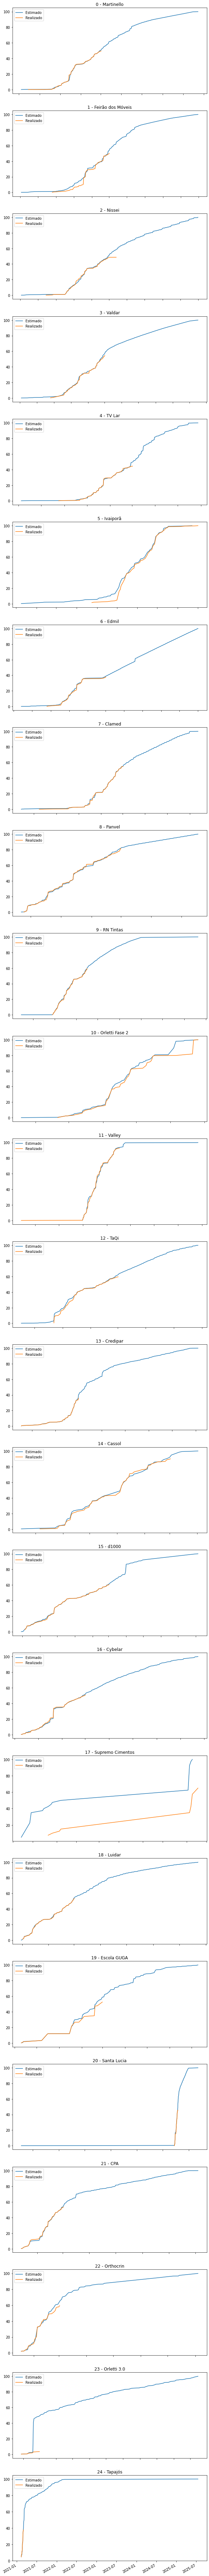

In [15]:
fig, ax = plt.subplots(len(EstimadoProjeto), 1, figsize=(10, 150))

for i, projeto in enumerate(EstimadoProjeto):
    ax[i].plot_date(x = EstimadoProjeto[i][1]['Término Estimado'], y = EstimadoProjeto[i][1]['Acumulado%'], linestyle = '-', marker='None', label = 'Estimado')
    ax[i].plot_date(x = RealProjeto[i][1]['Término Real'], y = RealProjeto[i][1]['Acumulado%'], linestyle = '-', marker='None', label = 'Realizado')
    ax[i].set_title(str(i) + ' - ' + EstimadoProjeto[i][0])
    ax[i].legend()
    #plt.xticks(rotation = 45)
    plt.gcf().autofmt_xdate()
    
plt.show()